# 201A Lab: November 20

Lauren Murai

### Problem 1a

The transition matrix P: The first row represents the probabilities of transitioning from state 1 to 1,2,3. The second row represents from state 2 to 1,2,3. And the third row represents from state 3 to 1,2,3. Using the Markov process defined in our graph we get P to be:

$$
P = \begin{bmatrix}
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.2 & 0.4 & 0.4 \\
\end{bmatrix}
$$
(included in math solutions)

### Problem 1b

In [13]:
import numpy as np

def simulate_chain(current_state, transition_matrix):
    '''
    Function to simulate a single step in the Markov chain
    '''
    return np.random.choice([1, 2, 3], p=transition_matrix[current_state-1])

P = np.array([
    [0.2, 0.7, 0.1],  
    [0.2, 0.5, 0.3],  
    [0.2, 0.4, 0.4]   
])

# Simulate the first step from X_0 = 1
X_i = 1

# State of chain for 10 steps of Markov Chain
for step in range(10):
    X_i = simulate_step(X_i, P)
    print(X_i)

2
3
2
1
2
1
2
3
3
1


### Problem 2a

In [15]:
import numpy as np

P = np.array([
    [0.2, 0.7, 0.1],
    [0.2, 0.5, 0.3],
    [0.2, 0.4, 0.4]
])

from scipy.linalg import eig

# Calculate the transpose of P
PT = P.T

# Find eigenvalues and right eigenvectors of P^T
eig_val, eig_vec = eig(PT)

# Find the eigenvector associated with the eigenvalue 1
# Note: we use a small tolerance because the eigenvalue might not be exactly 1 due to numerical precision
eig_vec = eig_vec[:, np.isclose(eig_val, 1, atol=1e-8)]

# Normalize the eigenvector to get a probability distribution (sums to 1)
stationary_distribution = eig_vec / np.sum(eig_vec)

stationary_distribution.real 

array([[0.2       ],
       [0.51111111],
       [0.28888889]])

### Problem 2b

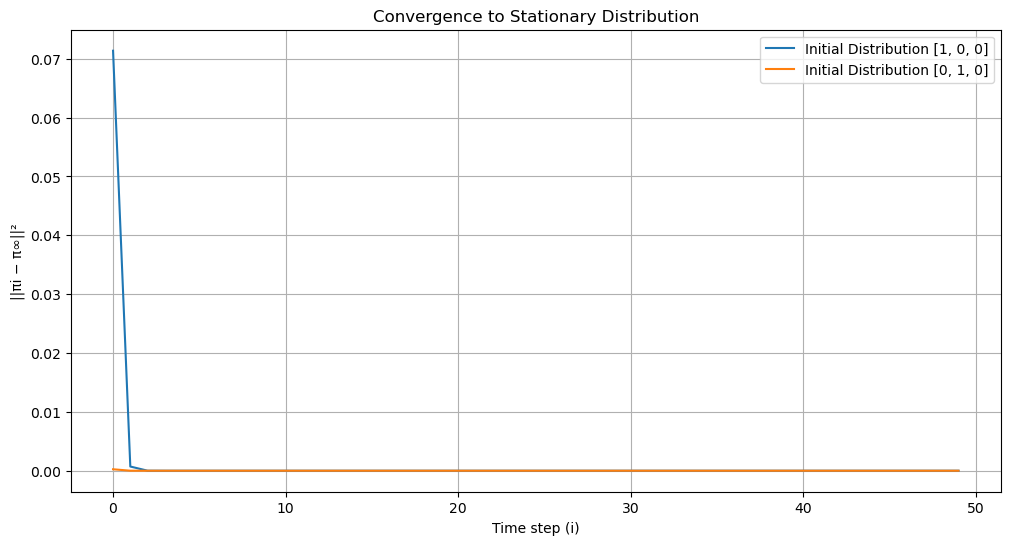

In [47]:
import matplotlib.pyplot as plt

# Two initial probability distributions
pi_0_a = np.array([1, 0, 0]) # start in first state
pi_0_b = np.array([0, 1, 0]) # start in second state

pi_inf = np.array([0.2, 0.51111111, 0.28888889])

num_steps = 50

# Arrays to store the norms of the differences
norms_a = np.zeros(num_steps)
norms_b = np.zeros(num_steps)

# Initialize to the initial conditions
pi_i_a = pi_0_a
pi_i_b = pi_0_b

# Iterate over the time steps
for i in range(num_steps):
    # Update the distributions
    pi_i_a = pi_i_a.dot(P)
    pi_i_b = pi_i_b.dot(P)
    
    # Find squared Euclidean norms of the difference with pi_inf
    norms_a[i] = np.linalg.norm(pi_i_a - pi_inf)**2
    norms_b[i] = np.linalg.norm(pi_i_b - pi_inf)**2


time_steps = np.arange(num_steps)
plt.figure(figsize=(12, 6))
plt.plot(time_steps, norms_a, label='Initial Distribution [1, 0, 0]')
plt.plot(time_steps, norms_b, label='Initial Distribution [0, 1, 0]')
plt.xlabel('Time step (i)')
plt.ylabel('||πi − π∞||²')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.grid(True)
plt.show()

### Problem 3a

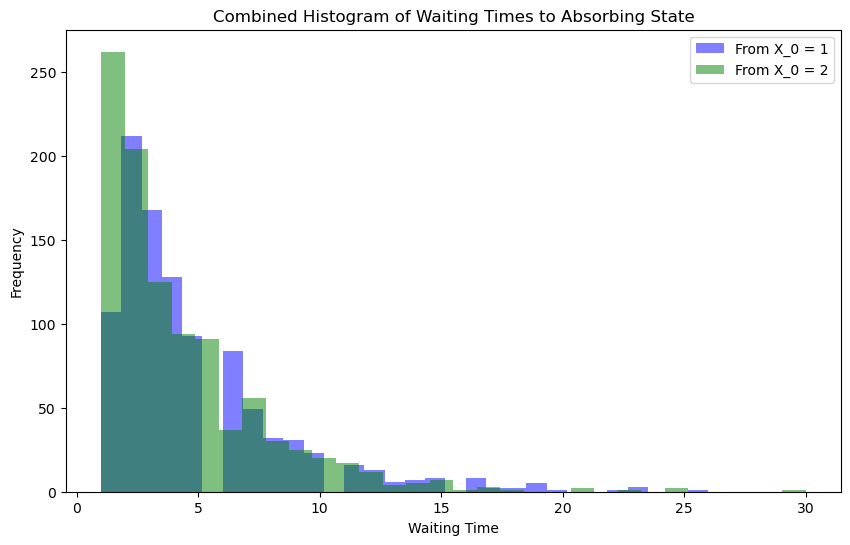

Mean starting from State 1: 4.682
Mean starting from State 2: 3.943


In [49]:
P_absorbing = P.copy()
P_absorbing[2] = np.array([0, 0, 1])

# Number of simulations
num_simulations = 1000

times_to_absorb_from_1 = [simulate_until_absorbed(0, P_absorbing) for _ in range(num_simulations)]
times_to_absorb_from_2 = [simulate_until_absorbed(1, P_absorbing) for _ in range(num_simulations)]

def simulate_until_absorbed(initial_state, P):
    '''
    Function to run a single simulation of the Markov chain until it hits the absorbing state
    '''
    state = initial_state
    time = 0
    # Run until we hit the absorbing state (state index 2 in Python, which corresponds to state 3)
    while state != 2:
        state = np.random.choice([0, 1, 2], p=P[state])
        time += 1
    return time

# Plotting the combined histogram for both initial states
plt.figure(figsize=(10, 6))
plt.hist(times_to_absorb_from_1, bins=30, color='blue', alpha=0.5, label='From X_0 = 1')
plt.hist(times_to_absorb_from_2, bins=30, color='green', alpha=0.5, label='From X_0 = 2')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Combined Histogram of Waiting Times to Absorbing State')
plt.legend()
plt.show()

# Compute means
mean_time_1 = np.mean(times_to_absorb_from_1)
mean_time_2 = np.mean(times_to_absorb_from_2 )
print(f"Mean starting from State 1: {mean_time_1}")
print(f"Mean starting from State 2: {mean_time_2}")

### Problem 3b

Included in math solutions